# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.003
-0.001
0.0
0.001
0.0
0.001
0.001
0.001
-0.001
0.002
0.002
0.001
0.0
-0.002
0.0
-0.001
-0.002
-0.002
-0.001
0.0
0.003
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
0.0
0.0
-0.004
-0.004
-0.002
-0.002
-0.002
-0.002
0.995
0.997
0.998
1.979
1.982
2.977
2.977
2.98
2.98
2.976
3.974
3.977
3.977
3.977
3.978
4.975
4.975
4.973
5.97
5.975
5.973
6.645
6.649
6.65
7.326
7.327
7.327
7.328
8.319
8.324
8.325
9.32
9.32
9.32
9.321
10.319
10.319
10.322
11.306
11.303
11.307
11.306
12.29
12.292
12.294
13.287
13.291
13.292
13.294
14.105
14.109
14.108
14.11
14.11
14.928
14.93
14.928
15.919
15.915
16.913
16.911
16.911
16.911
17.908
17.908
17.906
17.906
18.901
18.901
18.9
18.903
19.897
19.897
19.893
19.896
20.87
20.871
20.871
21.542
21.545
21.545
22.221
22.221
22.221
22.219
23.214
23.215
23.217
23.215
23.215
24.209
24.208
24.208
25.2
25.201
25.199
25.2
26.193
26.196
26.198
26.198
26.196
27.192
27.192
27.19
27.19
28.189
28.188
28.781
28.782
29.377
29.377
29.374
29.376
30.363
30.364
30.358
30.36
31.358
31.355

57.835
57.838
57.838
57.839
57.835
57.834
57.832
57.833
57.879
57.923
57.923
57.924
57.922
57.922
57.92
57.921
57.943
57.943
57.941
57.939
57.938
57.94
57.941
57.938
57.944
57.94
57.939
57.939
57.938
57.937
57.934
57.936
57.936
57.937
57.937
57.937
57.937
57.937
58.101
58.104
58.106
58.101
58.101
58.106
58.254
58.257
58.258
58.258
58.259
58.26
58.26
58.258
58.258
58.739
58.745
58.743
58.746
58.748
58.749
58.746
58.746
59.166
59.166
59.168
59.167
59.167
59.172
59.174
59.171
59.17
59.454
59.454
59.457
59.458
59.456
59.455
59.455
59.835
59.833
59.833
59.829
59.832
59.831
59.831
59.831
59.831
59.831
59.832
59.829
59.829


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.003
1,2,-0.001
2,4,0.000
3,6,0.001
4,8,0.000
...,...,...
1286,2572,59.831
1287,2574,59.831
1288,2576,59.832
1289,2578,59.829


<IPython.core.display.Javascript object>


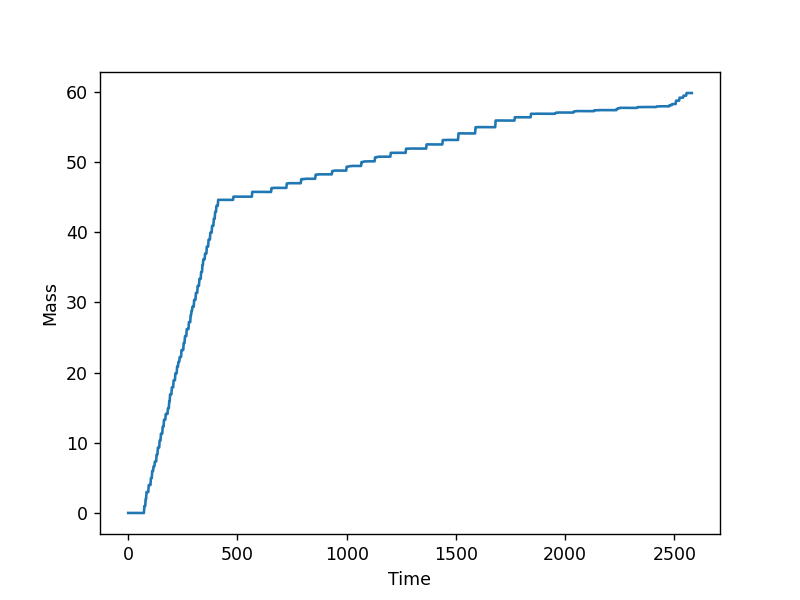

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_210423_S331-336.csv')